# EDA - NYC TAXI TRIP DURATION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
df = pd.read_csv(r"C:\Users\Admin\Downloads\nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [11]:
# Check for null values and data types
print(df.info())
print("\n\n")
print(df.isnull().sum())
print("\n\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB
None



id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0


In [15]:
# Summary statistics
print(df.describe())
print("\n\n")
print(df['vendor_id'].value_counts())
print("\n\n")
print(df['passenger_count'].value_counts())
print("\n\n")
print(df['store_and_fwd_flag'].value_counts())

           vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  729322.000000    729322.000000     729322.000000    729322.000000   
mean        1.535403         1.662055        -73.973513        40.750919   
std         0.498745         1.312446          0.069754         0.033594   
min         1.000000         0.000000       -121.933342        34.712234   
25%         1.000000         1.000000        -73.991859        40.737335   
50%         2.000000         1.000000        -73.981758        40.754070   
75%         2.000000         2.000000        -73.967361        40.768314   
max         2.000000         9.000000        -65.897385        51.881084   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      729322.000000     729322.000000   7.293220e+05  
mean          -73.973422         40.751775   9.522291e+02  
std             0.069588          0.036037   3.864626e+03  
min          -121.933304         32.181141   1.000000e+00  
25%           -

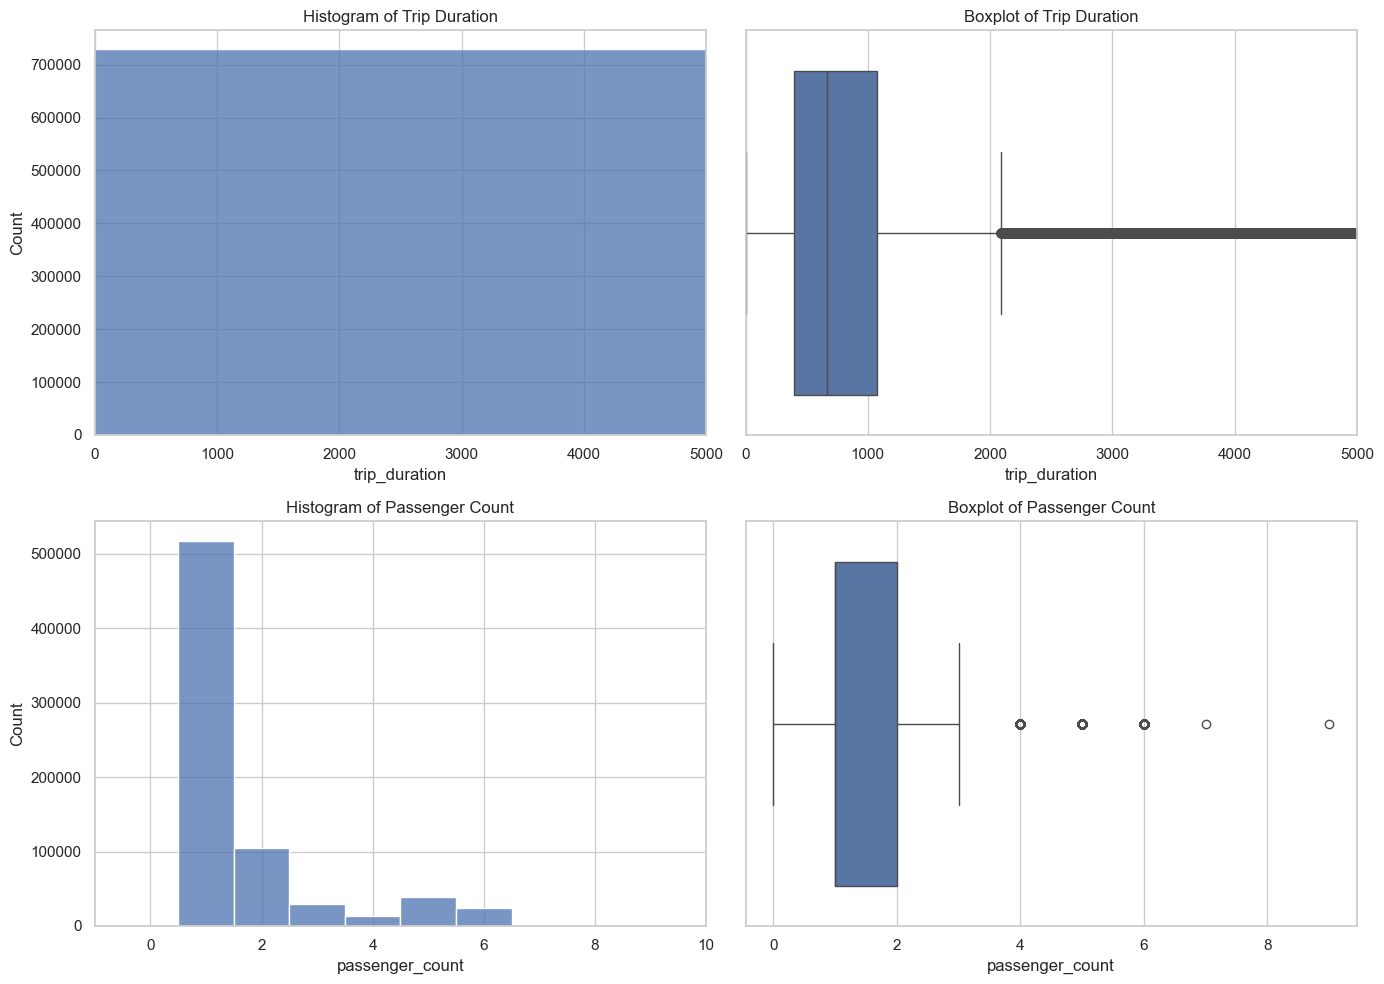

In [19]:
# Histograms and Boxplots for trip_duration and passenger_count
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['trip_duration'], bins=100, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Trip Duration')
axes[0, 0].set_xlim(0, 5000)

sns.boxplot(x=df['trip_duration'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Trip Duration')
axes[0, 1].set_xlim(0, 5000)

sns.histplot(df['passenger_count'], bins=10, discrete=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Passenger Count')

sns.boxplot(x=df['passenger_count'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Passenger Count')

plt.tight_layout()
plt.show()

In [22]:
# Convert datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Extract day, hour, weekday
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

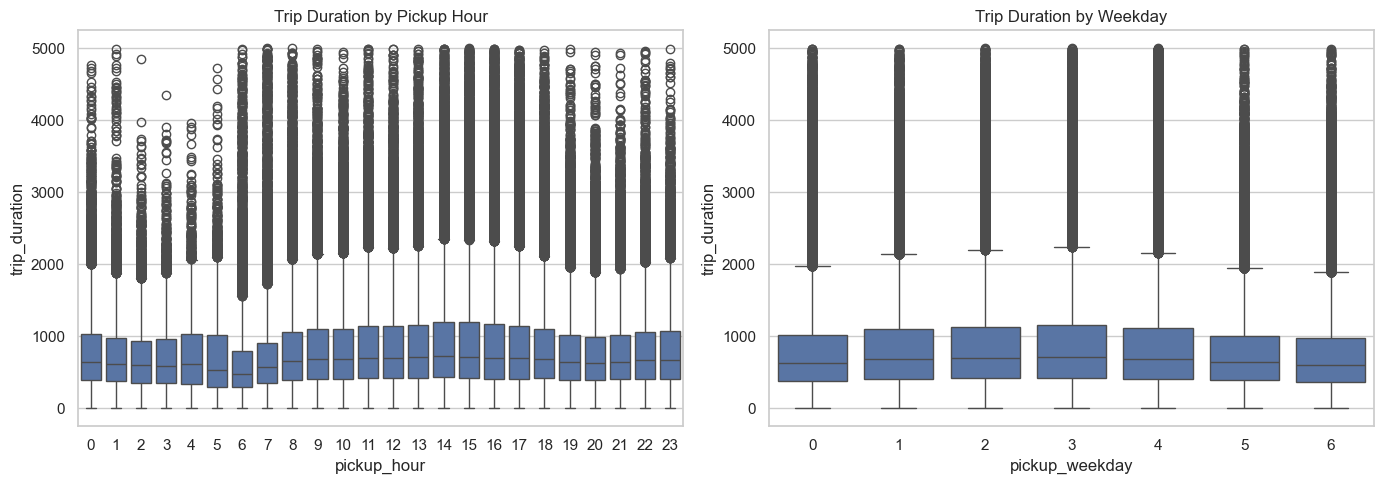

In [25]:
# Plot trip duration by time of day and weekday
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='pickup_hour', y='trip_duration', data=df[df['trip_duration'] < 5000], ax=axes[0])
axes[0].set_title('Trip Duration by Pickup Hour')

sns.boxplot(x='pickup_weekday', y='trip_duration', data=df[df['trip_duration'] < 5000], ax=axes[1])
axes[1].set_title('Trip Duration by Weekday')

plt.tight_layout()
plt.show()

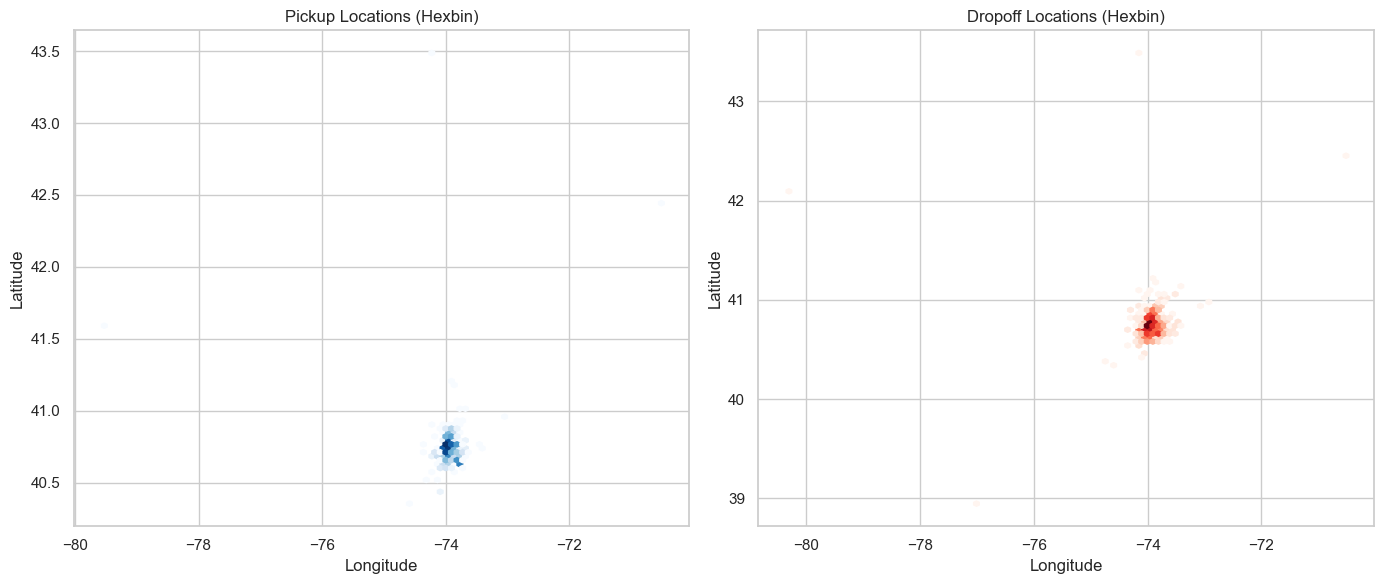

In [28]:
# Scatter plots or hexbin of pickup/dropoff locations
sample_df = df.sample(100000)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].hexbin(sample_df['pickup_longitude'], sample_df['pickup_latitude'],
               gridsize=100, cmap='Blues', bins='log')
axes[0].set_title('Pickup Locations (Hexbin)')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

axes[1].hexbin(sample_df['dropoff_longitude'], sample_df['dropoff_latitude'],
               gridsize=100, cmap='Reds', bins='log')
axes[1].set_title('Dropoff Locations (Hexbin)')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

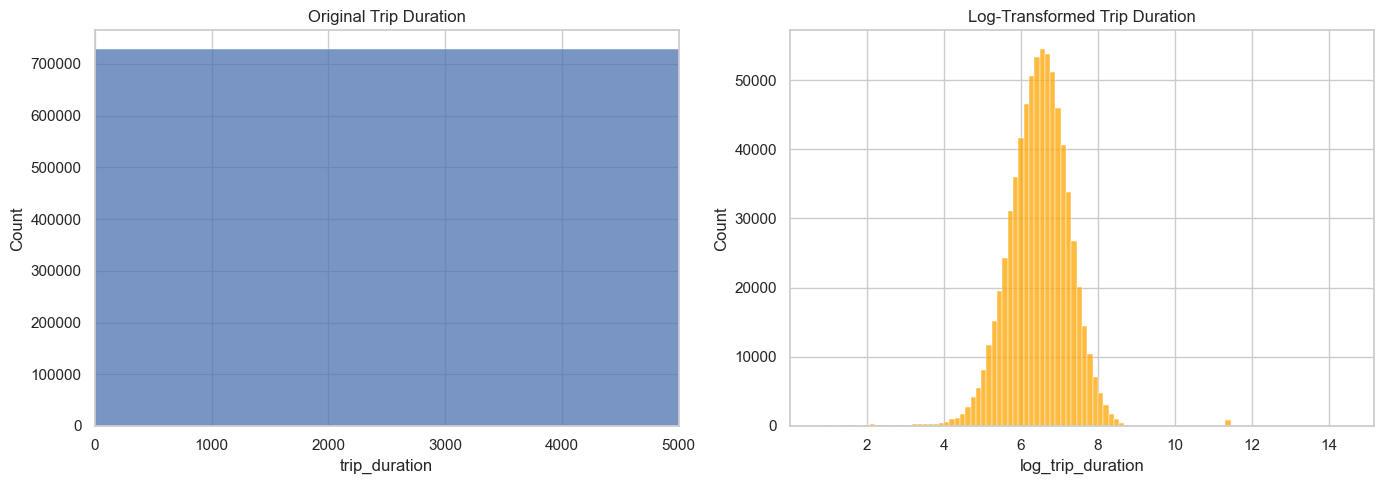

In [31]:
# Log-transform trip duration to reduce skewness
df['log_trip_duration'] = np.log1p(df['trip_duration'])

# Histograms before and after log-transform
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['trip_duration'], bins=100, ax=axes[0])
axes[0].set_title('Original Trip Duration')
axes[0].set_xlim(0, 5000)

sns.histplot(df['log_trip_duration'], bins=100, color='orange', ax=axes[1])
axes[1].set_title('Log-Transformed Trip Duration')

plt.tight_layout()
plt.show()

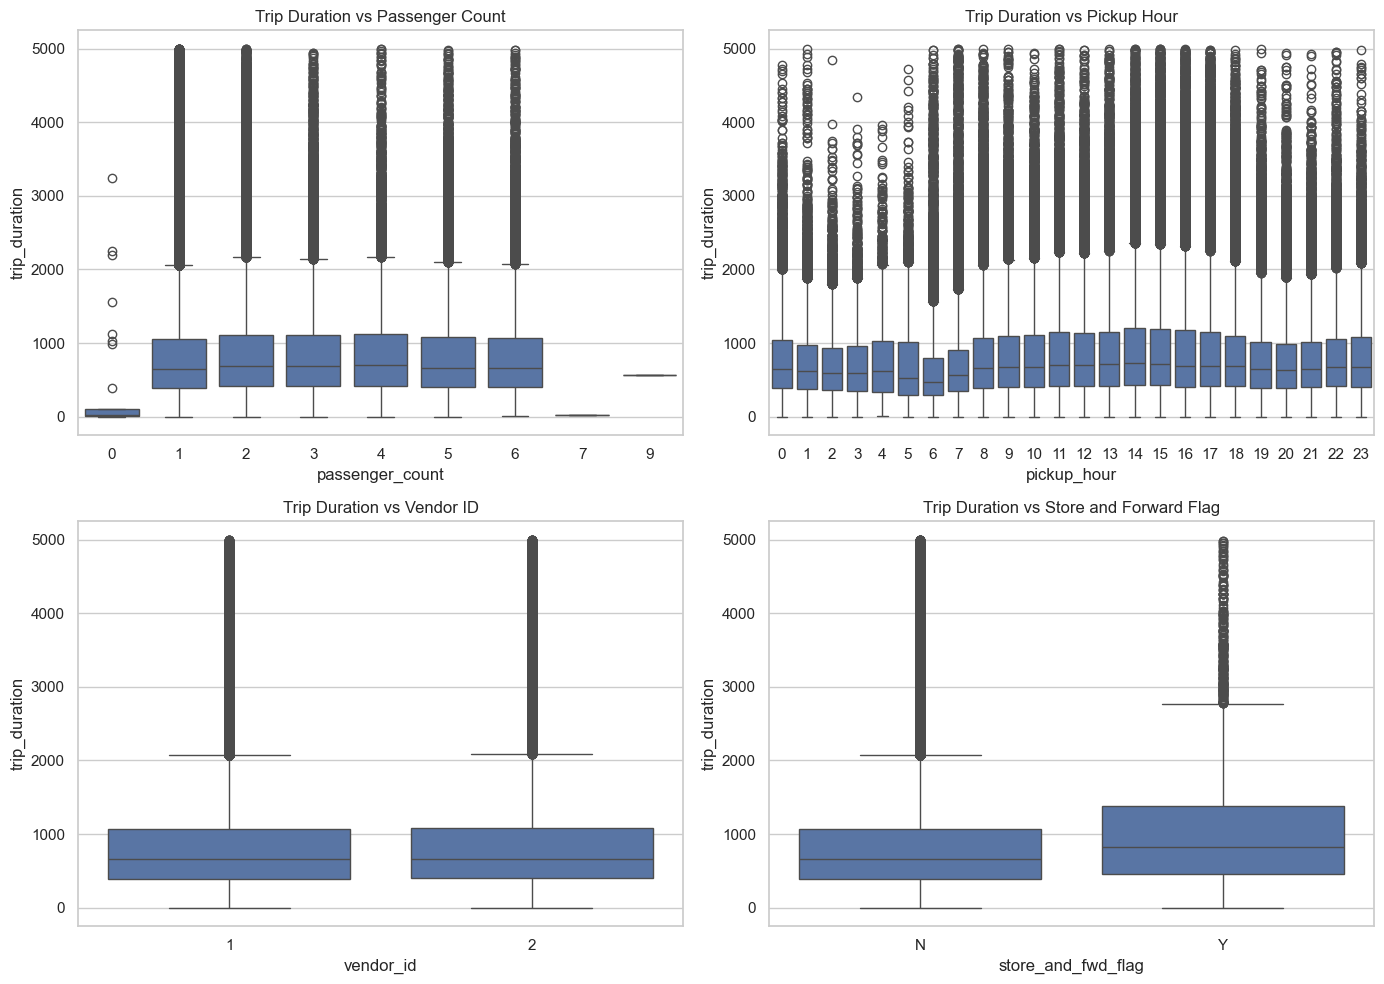

In [34]:
# Relationships with categorical/time features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='passenger_count', y='trip_duration', data=df[df['trip_duration'] < 5000], ax=axes[0, 0])
axes[0, 0].set_title('Trip Duration vs Passenger Count')

sns.boxplot(x='pickup_hour', y='trip_duration', data=df[df['trip_duration'] < 5000], ax=axes[0, 1])
axes[0, 1].set_title('Trip Duration vs Pickup Hour')

sns.boxplot(x='vendor_id', y='trip_duration', data=df[df['trip_duration'] < 5000], ax=axes[1, 0])
axes[1, 0].set_title('Trip Duration vs Vendor ID')

sns.boxplot(x='store_and_fwd_flag', y='trip_duration', data=df[df['trip_duration'] < 5000], ax=axes[1, 1])
axes[1, 1].set_title('Trip Duration vs Store and Forward Flag')

plt.tight_layout()
plt.show()